## marketing_campaign.csv

### Customer Personality Analysis: 고객 특성 분석
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

### 변수 정보

People 

* ID: Customer's unique identifier : 고객번호
* Year_Birth: Customer's birth year  : 출생연도
* Education: Customer's education level  : 교육수준, 학력
* Marital_Status: Customer's marital status  : 결혼 상태
* Income: Customer's yearly household income  : 가구 소득
* Kidhome: Number of children in customer's household  : 자녀 수
* Teenhome: Number of teenagers in customer's household  : 청소년 자녀 수
* Dt_Customer: Date of customer's enrollment with the company  : 고객 회사 등록 날짜
* Recency: Number of days since customer's last purchase  : 고객의 마지막 구매 이후 일 수
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise  : 지난 2년간 고객의 컴플레인 여부(한 경우 1, 아니면 0)

Products 

* MntWines: Amount spent on wine in last 2 years  : 지난 2년 와인 지출 비용
* MntFruits: Amount spent on fruits in last 2 years  : 지난 2년 과일 지출 비용
* MntMeatProducts: Amount spent on meat in last 2 years  : 지난 2년 육류 지출 비용
* MntFishProducts: Amount spent on fish in last 2 years  : 지난 2년 생선류 지출 비용
* MntSweetProducts: Amount spent on sweets in last 2 years  : 지난 2년 간식 지출 비용
* MntGoldProds: Amount spent on gold in last 2 years  : 지난 2년간 금 지출 비용


Promotion

* NumDealsPurchases: Number of purchases made with a discount  : 할인일 때 구매한 횟수
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  : 첫 번째 캠페인에서 제안 수락한 경우 1, 그 외 0
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  : 두 번재 캠페인에서 제안 수락한 경우 1,  그 외 0
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  : 세 번째 캠페인에서 제안 수락한 경우 1, 그 외 0
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  : 네 번째 캠페인에서 제안 수락한 경우 1,  그 외 0
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  : 다섯 번째 캠페인에서 제안 수락한 경우 1,  그 외 0
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise  : 마지막 캠페인에서 제안 수락한 경우 1,  그 외 0

Place

* NumWebPurchases: Number of purchases made through the company’s website : 웹사이트를 통해 구매한 횟수
* NumCatalogPurchases: Number of purchases made using a catalogue : 카탈로그를 통해 구매한 횟수
* NumStorePurchases: Number of purchases made directly in stores : 가게에서 구매한 횟수
* NumWebVisitsMonth: Number of visits to company’s website in the last month : 지난 달 웹사이트를 방문수

In [ ]:
# 22-07-31

1. 더미변수 변환해보기
2. 차원 축소 (주성분 분석)
3. 클러스터링 모델 공부하기 (k-means, ...)
4. 모델 적용해보기

In [ ]:
# 7/31 ~ 8/7 

변수 더 정리해서 적절한 k값도 찾고 주성분 분석해보고 -> 결정

In [ ]:
- 7/31 ~ 8/7 : 변수 더 정리해서 적절한 k값도 찾고 주성분 분석해보고 -> 결정
- 8/8 ~ 8/14 : 모델 돌리고 k-means 말고 다른 클러스터링 모델도 공부하면서 적용해보고
- 8/15 ~ 8/21 : 모델 간의 성능 비교해보고
- 8/22 ~ 8/28 : 최적 모델 찾기

- 8/28 ~ 8/30 : ppt 만들기 (군집의 특성, ... )
- 8/31 : 발표

In [1]:
# 모듈 불러오기

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import time

from numpy import nan 
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [78]:
# 데이터 불러오기

market_df = pd.read_csv("marketing_campaign.csv")
market_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### 1. 중복 데이터 확인

In [3]:
market_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [4]:
# 중복 데이터 없음

market_df[market_df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


### 2. 결측치 처리

In [5]:
# 결측치 확인하기
# income 24개 결측치

market_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
# 결측치 확인하기

market_df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

###  결측치 삭제 (income 24개)

In [79]:
# 결측치 처리 >> income 24개 데이터 삭제

marketn_df = market_df.dropna()

In [44]:
# 결측치 제거 후 확인하기
# 결측치 0개

marketn_df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [80]:
# 결측치 삭제 후 행 2216개
marketn_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### 3. 이상치

<function matplotlib.pyplot.show(close=None, block=None)>

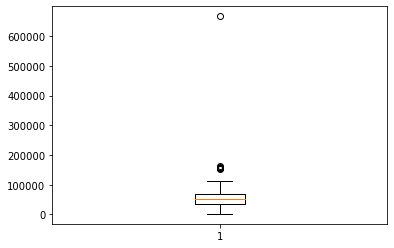

In [10]:
# income변수 박스플롯

fig, ax = plt.subplots()
ax.boxplot(marketn_df.Income)
plt.show

In [11]:
# 이상치 탐지 함수
def outliers(data):
    q1, q3 = np.percentile(data, [25,75])
    
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data>upper_bound)|(data<lower_bound))

In [12]:
outliers(marketn_df.Income)

(array([ 153,  604,  642,  674, 1287, 1636, 2109, 2209], dtype=int64),)

In [81]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
  
    
    # 이상치 존재 행
    return np.where((data[column]>upper)|(data[column]<lower))

In [16]:
outlier_iqr(marketn_df, 'Income')

IQR은 33219.0 이다.
lower bound 값은 -14525.5 이다.
upper bound 값은 118350.5 이다.


(array([ 153,  604,  642,  674, 1287, 1636, 2109, 2209], dtype=int64),)

In [82]:
# Income 이상치 8개 지우기
## 2208행
## marketo_df

mk = marketn_df[(marketn_df['Income'] < upper) & (marketn_df['Income'] > lower)]
mk

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [19]:
len(mk)

2208

In [21]:
mk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2208 non-null   int64  
 1   Year_Birth           2208 non-null   int64  
 2   Education            2208 non-null   object 
 3   Marital_Status       2208 non-null   object 
 4   Income               2208 non-null   float64
 5   Kidhome              2208 non-null   int64  
 6   Teenhome             2208 non-null   int64  
 7   Dt_Customer          2208 non-null   object 
 8   Recency              2208 non-null   int64  
 9   MntWines             2208 non-null   int64  
 10  MntFruits            2208 non-null   int64  
 11  MntMeatProducts      2208 non-null   int64  
 12  MntFishProducts      2208 non-null   int64  
 13  MntSweetProducts     2208 non-null   int64  
 14  MntGoldProds         2208 non-null   int64  
 15  NumDealsPurchases    2208 non-null   i

### 4. 추가변수/파생변수

In [ ]:
* 추가변수/파생변수 모두 추가하기

### 나이 변수 추가

In [83]:
mk['Age'] = 2022 - mk['Year_Birth'] + 1

C:\Users\abab6\AppData\Local\Temp/ipykernel_10964/2831194360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk['Age'] = 2022 - mk['Year_Birth'] + 1


In [84]:
#제품에 지출된 총액
mk['TotalMntSpent'] = mk['MntWines'] + mk['MntFruits'] + mk['MntMeatProducts'] + mk['MntFishProducts'] + mk['MntSweetProducts'] + mk['MntGoldProds']

#총 구매 건수
mk['TotalNumPurchases'] = mk['NumWebPurchases'] + mk['NumCatalogPurchases'] + mk['NumStorePurchases'] + mk['NumDealsPurchases']

# 승인된 총 캠페인 수
mk['Total_Acc_Cmp'] = mk['AcceptedCmp1'] + mk['AcceptedCmp2'] + mk['AcceptedCmp3'] + mk['AcceptedCmp4'] + mk['AcceptedCmp5'] + mk['Response']

# 결혼상태에 따른 파트너 유무
mk["Partner"]=mk["Marital_Status"].replace({"Married":"Yes", "Together":"Yes", "Absurd":"No", "Widow":"No", "YOLO":"No", "Divorced":"No", "Single":"No","Alone":"No"})

# 가구 내 총 자녀 수
mk["Children"] = mk["Kidhome"] +  mk["Teenhome"]

# 가족수
mk["Family_Size"] = mk["Partner"].replace({"No": 1, "Yes":2})+ mk["Children"]

#부모인지 아닌지
mk["Is_Parent"] = np.where(mk.Children> 0, 1, 0)

# 교육 수준을 세 그룹으로 세분화
mk["Education_Level"]=mk["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# 가입한 날짜, 월 및 연도에 대한 열 추가
mk['Dt_Customer'] = pd.to_datetime(mk['Dt_Customer']) # datetime 변환
mk['Year_Joined'] = mk['Dt_Customer'].dt.year # 연도 추출
mk['Month_Joined'] = mk['Dt_Customer'].dt.strftime("%B") # strftime: 날짜 형식 변환 %B:locale 월
mk['Day_Joined'] = mk['Dt_Customer'].dt.day_name() # day_name: 요일을 문자열로 추출
mk["Dt_Customer"].dt.year.min() , mk["Dt_Customer"].dt.year.max()


# 나이에 따른 그룹 나누기
mk['Age_Group'] = pd.cut(x = mk['Age'], bins = [1, 17, 24, 44, 64, 150],
                         labels = ['Under 18','Young adult','Adult','Middel Aged','Senior Citizen'])

C:\Users\abab6\AppData\Local\Temp/ipykernel_10964/2760490430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk['TotalMntSpent'] = mk['MntWines'] + mk['MntFruits'] + mk['MntMeatProducts'] + mk['MntFishProducts'] + mk['MntSweetProducts'] + mk['MntGoldProds']
C:\Users\abab6\AppData\Local\Temp/ipykernel_10964/2760490430.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk['TotalNumPurchases'] = mk['NumWebPurchases'] + mk['NumCatalogPurchases'] + mk['NumStorePurchases'] + mk['NumDealsPurchases']
C:\Users\

### 변수 정리 - 기존 변수 삭제 / 가입기간 변수 추가

In [ ]:
# 연령 및 연도 생성_고객 (최근 날짜 언젠지 몰라서 날짜 최댓값에서 고객 등록일 뺐던 것 같음)

# mk['Years_Customer'] = (mk["Dt_Customer"].dt.year.max()) - (mk['Dt_Customer'].dt.year)
# mk['Days_Customer'] = (mk["Dt_Customer"].max()) - (mk['Dt_Customer'])

In [85]:
# 2022년 기준으로 고객나이 환산
# 고객이 등록한지 얼마나 지났는지도 현재 시간 기준으로 하는게 통일성 있을 듯

import time

today = time.strftime('%Y-%m-%d', time.localtime(time.time()))
today

'2022-08-06'

In [86]:
# 가입기간(연도 기준, 날짜 기준 변수 생성)

today = pd.to_datetime(today) # datetime 변환

mk['Year_Period'] = today.year - (mk['Dt_Customer'].dt.year)
mk['Day_Period'] = today - (mk['Dt_Customer'])

C:\Users\abab6\AppData\Local\Temp/ipykernel_10964/2582447392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk['Year_Period'] = today.year - (mk['Dt_Customer'].dt.year)
C:\Users\abab6\AppData\Local\Temp/ipykernel_10964/2582447392.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk['Day_Period'] = today - (mk['Dt_Customer'])


In [88]:
# 2208행, 44열

mk

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Children,Family_Size,Is_Parent,Education_Level,Year_Joined,Month_Joined,Day_Joined,Age_Group,Year_Period,Day_Period
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,1,0,Graduate,2012,April,Monday,Senior Citizen,10,3771 days
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,2,3,1,Graduate,2014,August,Sunday,Senior Citizen,8,2925 days
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,2,0,Graduate,2013,August,Wednesday,Middel Aged,9,3272 days
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,1,3,1,Graduate,2014,October,Thursday,Adult,8,2865 days
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,1,3,1,Postgraduate,2014,January,Sunday,Adult,8,3121 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,1,3,1,Graduate,2013,June,Thursday,Middel Aged,9,3341 days
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,3,5,1,Postgraduate,2014,October,Monday,Senior Citizen,8,2861 days
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,Graduate,2014,January,Saturday,Adult,8,3115 days
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,1,3,1,Postgraduate,2014,January,Friday,Senior Citizen,8,3116 days


In [ ]:
* 기존에 만든 추가변수/파생변수

In [38]:
# 회사 등록 날짜 dt_customer 변수 >> datetime 변환

marketo_df['Dt_Customer'] = pd.to_datetime(marketo_df['Dt_Customer'])

C:\Users\abab6\AppData\Local\Temp/ipykernel_25656/1666961187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketo_df['Dt_Customer'] = pd.to_datetime(marketo_df['Dt_Customer'])


In [39]:
# 1. 월 변수

marketo_df['Dt_Year'] = marketo_df['Dt_Customer'].dt.year # 연도 정보
marketo_df.head()

C:\Users\abab6\AppData\Local\Temp/ipykernel_25656/3031273515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketo_df['Dt_Year'] = marketo_df['Dt_Customer'].dt.year # 연도 정보


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Year
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,2012
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,2014
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,2013
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,2014
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,2014


In [40]:
# 2. 연도 변수

marketo_df['Dt_Month'] = marketo_df['Dt_Customer'].dt.month # 월 정보
marketo_df.head()

C:\Users\abab6\AppData\Local\Temp/ipykernel_25656/1884058987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketo_df['Dt_Month'] = marketo_df['Dt_Customer'].dt.month # 월 정보


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Year,Dt_Month
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,2012,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,2014,8
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,2013,8
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,2014,10
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,2014,1


In [41]:
# 3. 나이 변수

marketo_df['Age'] = 2022 - marketo_df['Year_Birth'] + 1
marketo_df.head()

C:\Users\abab6\AppData\Local\Temp/ipykernel_25656/3378757141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketo_df['Age'] = 2022 - marketo_df['Year_Birth'] + 1


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Year,Dt_Month,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,2012,4,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,2014,8,69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,2013,8,58
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,2014,10,39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,2014,1,42


In [44]:
marketo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2208 non-null   int64         
 1   Year_Birth           2208 non-null   int64         
 2   Education            2208 non-null   object        
 3   Marital_Status       2208 non-null   object        
 4   Income               2208 non-null   float64       
 5   Kidhome              2208 non-null   int64         
 6   Teenhome             2208 non-null   int64         
 7   Dt_Customer          2208 non-null   datetime64[ns]
 8   Recency              2208 non-null   int64         
 9   MntWines             2208 non-null   int64         
 10  MntFruits            2208 non-null   int64         
 11  MntMeatProducts      2208 non-null   int64         
 12  MntFishProducts      2208 non-null   int64         
 13  MntSweetProducts     2208 non-nul

In [46]:
# 4. 지출 총액

marketo_df['TotalMnt'] = marketo_df['MntWines'] +marketo_df['MntFruits'] + marketo_df['MntMeatProducts'] +marketo_df['MntFishProducts'] +  marketo_df['MntSweetProducts']+  marketo_df['MntGoldProds']
    
marketo_df

C:\Users\abab6\AppData\Local\Temp/ipykernel_25656/2230519535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketo_df['TotalMnt'] = marketo_df['MntWines'] +marketo_df['MntFruits'] + marketo_df['MntMeatProducts'] +marketo_df['MntFishProducts'] +  marketo_df['MntSweetProducts']+  marketo_df['MntGoldProds']


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Year,Dt_Month,Age,TotalMnt
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,3,11,1,2012,4,66,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,3,11,0,2014,8,69,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,2013,8,58,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,3,11,0,2014,10,39,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,2014,1,42,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,3,11,0,2013,6,56,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,1,0,0,3,11,0,2014,10,77,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,3,11,0,2014,1,42,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,3,11,0,2014,1,67,843


In [47]:
# 5. 총 구매 수

marketo_df['TotalNum'] =marketo_df['NumDealsPurchases'] + marketo_df['NumWebPurchases'] + marketo_df['NumCatalogPurchases']+ marketo_df['NumStorePurchases'] 

marketo_df

C:\Users\abab6\AppData\Local\Temp/ipykernel_25656/974219499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketo_df['TotalNum'] =marketo_df['NumDealsPurchases'] + marketo_df['NumWebPurchases'] + marketo_df['NumCatalogPurchases']+ marketo_df['NumStorePurchases']


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Year,Dt_Month,Age,TotalMnt,TotalNum
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,2012,4,66,1617,25
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,2014,8,69,27,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,2013,8,58,776,21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,2014,10,39,53,8
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,2014,1,42,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,2013,6,56,1341,18
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,0,3,11,0,2014,10,77,444,22
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,2014,1,42,1241,19
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,2014,1,67,843,23


In [48]:
# 6. 총 자녀 수

marketo_df["Children"] = marketo_df["Kidhome"] + marketo_df["Teenhome"]
marketo_df

C:\Users\abab6\AppData\Local\Temp/ipykernel_25656/3632271787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketo_df["Children"] = marketo_df["Kidhome"] + marketo_df["Teenhome"]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Dt_Year,Dt_Month,Age,TotalMnt,TotalNum,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,2012,4,66,1617,25,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,2014,8,69,27,6,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,2013,8,58,776,21,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,3,11,0,2014,10,39,53,8,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,2014,1,42,422,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,2013,6,56,1341,18,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,3,11,0,2014,10,77,444,22,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,2014,1,42,1241,19,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,2014,1,67,843,23,1


### 5. Age > 100 삭제

In [89]:
marketo_df = mk.copy()

In [52]:
#  Age > 100 인 데이터 확인
## 3개

marketo_df[marketo_df['Age'] > 100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Children,Family_Size,Is_Parent,Education_Level,Year_Joined,Month_Joined,Day_Joined,Years_Customer,Days_Customer,Age_Group
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,1,2,1,Undergraduate,2013,September,Thursday,1,436 days,Senior Citizen
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,1,2,1,Undergraduate,2014,May,Saturday,0,203 days,Senior Citizen
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,2,0,Postgraduate,2013,September,Thursday,1,436 days,Senior Citizen


In [90]:
# Age < 100 인 데이터만 포함
## 2205행

marketa_df = marketo_df[marketo_df['Age'] < 100]
marketa_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Children,Family_Size,Is_Parent,Education_Level,Year_Joined,Month_Joined,Day_Joined,Age_Group,Year_Period,Day_Period
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,1,0,Graduate,2012,April,Monday,Senior Citizen,10,3771 days
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,2,3,1,Graduate,2014,August,Sunday,Senior Citizen,8,2925 days
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,2,0,Graduate,2013,August,Wednesday,Middel Aged,9,3272 days
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,1,3,1,Graduate,2014,October,Thursday,Adult,8,2865 days
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,1,3,1,Postgraduate,2014,January,Sunday,Adult,8,3121 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,1,3,1,Graduate,2013,June,Thursday,Middel Aged,9,3341 days
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,3,5,1,Postgraduate,2014,October,Monday,Senior Citizen,8,2861 days
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,Graduate,2014,January,Saturday,Adult,8,3115 days
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,1,3,1,Postgraduate,2014,January,Friday,Senior Citizen,8,3116 days


In [91]:
# 변수 삭제
# 42열

marketa_df= marketa_df.drop(columns = ['Z_CostContact','Z_Revenue'])
marketa_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Children,Family_Size,Is_Parent,Education_Level,Year_Joined,Month_Joined,Day_Joined,Age_Group,Year_Period,Day_Period
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,1,0,Graduate,2012,April,Monday,Senior Citizen,10,3771 days
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,2,3,1,Graduate,2014,August,Sunday,Senior Citizen,8,2925 days
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,2,0,Graduate,2013,August,Wednesday,Middel Aged,9,3272 days
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,1,3,1,Graduate,2014,October,Thursday,Adult,8,2865 days
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,1,3,1,Postgraduate,2014,January,Sunday,Adult,8,3121 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,1,3,1,Graduate,2013,June,Thursday,Middel Aged,9,3341 days
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,3,5,1,Postgraduate,2014,October,Monday,Senior Citizen,8,2861 days
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,Graduate,2014,January,Saturday,Adult,8,3115 days
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,1,3,1,Postgraduate,2014,January,Friday,Senior Citizen,8,3116 days


### 6. 상관관계

In [57]:
m_corr = marketa_df.corr()
m_corr 

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Year,Dt_Month,Age,TotalMnt,TotalNum,Children
ID,1.000000,0.007344,0.001633,0.002030,-0.003292,-0.046991,-0.018822,0.010178,-0.001817,-0.022333,...,-0.018042,-0.014934,0.031882,-0.021187,-0.007577,0.029399,-0.007344,-0.013573,-0.020174,-0.000937
Year_Birth,0.007344,1.000000,-0.212625,0.238083,-0.362919,-0.014228,-0.164438,-0.013149,-0.041540,-0.040855,...,-0.011747,-0.007737,-0.004531,0.021305,-0.023908,0.011242,-1.000000,-0.118404,-0.186733,-0.093007
Income,0.001633,-0.212625,1.000000,-0.531699,0.042483,0.006716,0.730495,0.537920,0.702500,0.551758,...,0.345242,0.110210,-0.027488,0.174902,0.025237,0.010016,0.212625,0.823770,0.701568,-0.350313
Kidhome,0.002030,0.238083,-0.531699,1.000000,-0.040207,0.011829,-0.499288,-0.374388,-0.445665,-0.389895,...,-0.174741,-0.082124,0.037025,-0.078409,0.054210,0.000924,-0.238083,-0.558234,-0.485597,0.687697
Teenhome,-0.003292,-0.362919,0.042483,-0.040207,1.000000,0.013881,0.002783,-0.176925,-0.267177,-0.206371,...,-0.145748,-0.015805,0.007633,-0.155196,-0.010814,0.004841,0.362919,-0.138565,0.133866,0.697760
Recency,-0.046991,-0.014228,0.006716,0.011829,0.013881,1.000000,0.016470,-0.004909,0.026138,0.001177,...,-0.021097,-0.001390,0.005758,-0.200413,-0.029089,-0.006303,0.014228,0.021824,0.009414,0.018566
MntWines,-0.018822,-0.164438,0.730495,-0.499288,0.002783,0.016470,1.000000,0.384947,0.593119,0.395967,...,0.351346,0.206231,-0.036709,0.245559,-0.154474,0.037033,0.164438,0.897262,0.721080,-0.355922
MntFruits,0.010178,-0.013149,0.537920,-0.374388,-0.176925,-0.004909,0.384947,1.000000,0.568100,0.592556,...,0.192061,-0.010147,-0.003135,0.122331,-0.054170,-0.001754,0.013149,0.614464,0.458562,-0.396954
MntMeatProducts,-0.001817,-0.041540,0.702500,-0.445665,-0.267177,0.026138,0.593119,0.568100,1.000000,0.595673,...,0.325306,0.045842,-0.020921,0.248821,-0.079831,0.039032,0.041540,0.856838,0.560159,-0.513629
MntFishProducts,-0.022333,-0.040855,0.551758,-0.389895,-0.206371,0.001177,0.395967,0.592556,0.595673,1.000000,...,0.261389,0.002093,-0.019299,0.107405,-0.066615,-0.013100,0.040855,0.644453,0.472588,-0.429466


### income과의 상관관계

In [65]:
marketa_df.corr().Income

ID                     0.001633
Year_Birth            -0.212625
Income                 1.000000
Kidhome               -0.531699
Teenhome               0.042483
Recency                0.006716
MntWines               0.730495
MntFruits              0.537920
MntMeatProducts        0.702500
MntFishProducts        0.551758
MntSweetProducts       0.555601
MntGoldProds           0.417653
NumDealsPurchases     -0.132427
NumWebPurchases        0.503184
NumCatalogPurchases    0.710057
NumStorePurchases      0.687206
NumWebVisitsMonth     -0.648306
AcceptedCmp3          -0.011181
AcceptedCmp4           0.233267
AcceptedCmp5           0.416386
AcceptedCmp1           0.345242
AcceptedCmp2           0.110210
Complain              -0.027488
Response               0.174902
Dt_Year                0.025237
Dt_Month               0.010016
Age                    0.212625
TotalMnt               0.823770
TotalNum               0.701568
Children              -0.350313
Name: Income, dtype: float64

In [60]:
# 음의 상관관계 - 어린이
marketa_df["Income"].corr(marketa_df["Kidhome"])

-0.531698919774873

In [61]:
# 강한 양의 상관관계 - 와인
marketa_df["Income"].corr(marketa_df["MntWines"])

0.7304951613642848

In [62]:
# 양의 상관관계 - 과일
marketa_df["Income"].corr(marketa_df["MntFruits"])

0.5379202581686495

In [63]:
# 강한 양의 상관관계 - 육류
marketa_df["Income"].corr(marketa_df["MntMeatProducts"])

0.702499619645679

In [64]:
# 양의 상관관계 - 생선
marketa_df["Income"].corr(marketa_df["MntFishProducts"])

0.5517580018179091

In [66]:
# 양의 상관관계 - 간식
marketa_df["Income"].corr(marketa_df["MntSweetProducts"])

0.5556010365636543

In [67]:
# 양의 상관관계 - 웹 구매 건수
marketa_df["Income"].corr(marketa_df["NumWebPurchases"])

0.5031842017362943

In [68]:
# 강한 양의 상관관계 - 카탈로그를 통해 구매
marketa_df["Income"].corr(marketa_df["NumCatalogPurchases"])

0.710056534147072

In [69]:
# 양의 상관관계 - 가게를 통해 구매
marketa_df["Income"].corr(marketa_df["NumStorePurchases"])

0.6872057162979321

In [70]:
# 음의 상관관계 - 웹 방문수
marketa_df["Income"].corr(marketa_df["NumWebVisitsMonth"])

-0.6483062734574427

In [ ]:
## 추가변수/파생변수

In [71]:
# 강한 양의 상관관계 - 총 구매 액
marketa_df["Income"].corr(marketa_df["TotalMnt"])

0.8237696997821239

In [72]:
# 강한 양의 상관관계 - 총 구매 건수
marketa_df["Income"].corr(marketa_df["TotalNum"])

0.701568253970574

In [58]:
# 상관계수 최대값
m_corr = m_corr[m_corr != 1] # 상관계수 1 제외
m_corr[m_corr == m_corr.max()]

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Year,Dt_Month,Age,TotalMnt,TotalNum,Children
ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_Birth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kidhome,NaN,0.238083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.037025,NaN,0.05421,NaN,NaN,NaN,NaN,NaN
Teenhome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.362919,NaN,NaN,0.69776
Recency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntWines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.897262,NaN,NaN
MntFruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntMeatProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.039032,NaN,NaN,NaN,NaN
MntFishProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# 상관계수 최솟값
m_corr = m_corr[m_corr != 1] # 상관계수 1 제외
m_corr[m_corr == m_corr.min()]

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Year,Dt_Month,Age,TotalMnt,TotalNum,Children
ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_Birth,NaN,NaN,NaN,NaN,-0.362919,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN
Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kidhome,NaN,NaN,NaN,NaN,NaN,NaN,-0.499288,NaN,NaN,NaN,...,NaN,-0.082124,NaN,NaN,NaN,NaN,NaN,-0.558234,-0.485597,NaN
Teenhome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,-0.046991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.200413,NaN,NaN,NaN,NaN,NaN,NaN
MntWines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.036709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntFruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntMeatProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.513629
MntFishProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

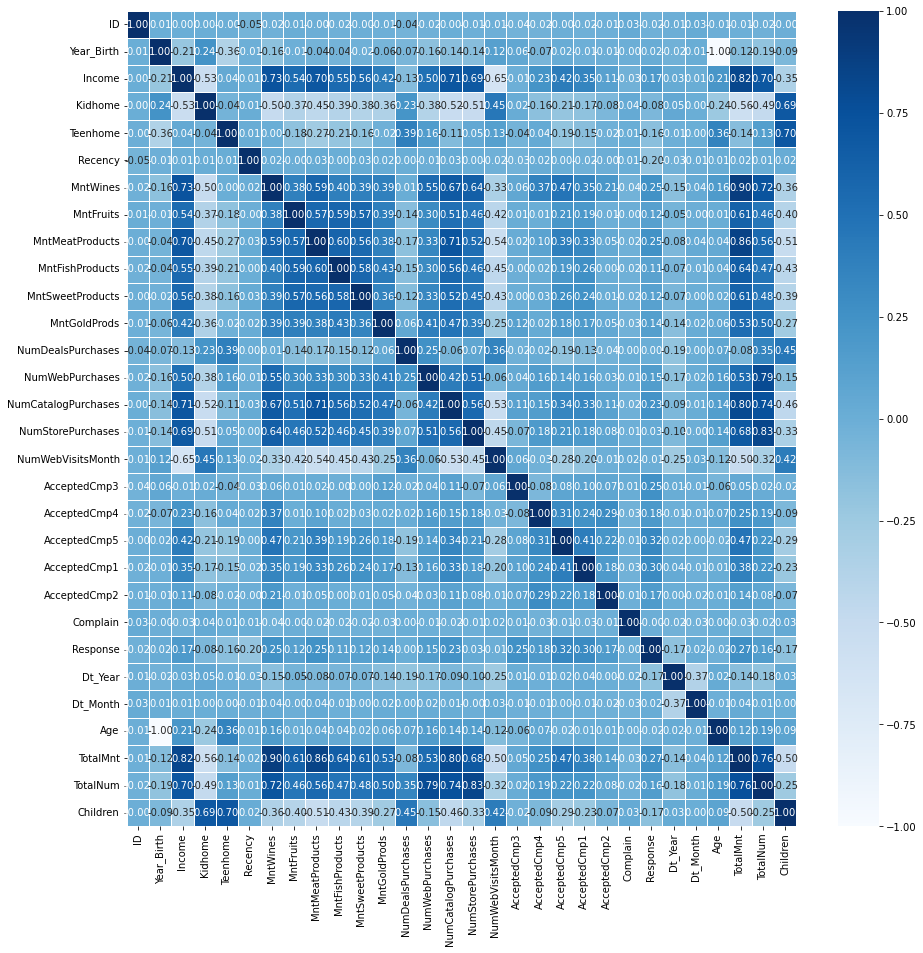

In [73]:
# 히트맵

plt.figure(figsize=(15,15))
sns.heatmap(data = marketa_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
# 모델 공부하기
# 그러면 추가해서 모델 ..돌려볼수있음 돌려보기
# 모델공부하고 더미변수 변환해보고
# 민영님이 말씀하신것처럼 차원축소도 공부

In [ ]:
# 22-07-31

1. 더미변수 변환해보기
2. 차원 축소 (주성분 분석)
3. 클러스터링 모델 공부하기 (k-means, ...)
4. 모델 적용해보기


### 7.더미변수 변환

In [92]:
md = marketa_df.copy()

In [30]:
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   ID                   2205 non-null   int64          
 1   Year_Birth           2205 non-null   int64          
 2   Education            2205 non-null   object         
 3   Marital_Status       2205 non-null   object         
 4   Income               2205 non-null   float64        
 5   Kidhome              2205 non-null   int64          
 6   Teenhome             2205 non-null   int64          
 7   Dt_Customer          2205 non-null   datetime64[ns] 
 8   Recency              2205 non-null   int64          
 9   MntWines             2205 non-null   int64          
 10  MntFruits            2205 non-null   int64          
 11  MntMeatProducts      2205 non-null   int64          
 12  MntFishProducts      2205 non-null   int64          
 13  MntSweetProducts  

### 범주 확인

* 기존 변수: Education(교육), Marital_Status(결혼상태)
* 추가/파생변수: Partner(배우자 여부), Education_Level(교육 수준),  Month_Joined(등록 월),Day_Joined (등록 요일)

In [ ]:
* 기존 변수

In [31]:
# 교육
## 교육수준에 대한 추가변수 생성함
## 변수 삭제
print(md['Education'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [32]:
# 결혼 상태
## 배우자 여부에 대한 추가변수 생성함
## 변수 삭제

print(md['Marital_Status'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [ ]:
* 추가변수

In [33]:
# 배우자 여부
## 더미변수 변환

print(md['Partner'].unique())

['No' 'Yes']


In [45]:
# 교육수준 - 졸업 전, 졸업, 졸업 후
## 더미변수 변환

print(md['Education_Level'].unique())

['Graduate' 'Postgraduate' 'Undergraduate']


In [ ]:
# 등록 월, 요일

## 월 = 상반기, 하반기
## 요일 = 평일, 주말

In [46]:
print(md['Month_Joined'].unique())

['April' 'August' 'October' 'January' 'September' 'November' 'June'
 'March' 'December' 'February' 'May' 'July']


In [47]:
print(md['Day_Joined'].unique())

['Monday' 'Sunday' 'Wednesday' 'Thursday' 'Tuesday' 'Friday' 'Saturday']


In [93]:
# 월 : 상반기 / 하반기

md['Month_Joined'] = md['Month_Joined'].replace({'January':'First_half', 'February':'First_half','March':'First_half','April':'First_half','May':'First_half', 'June':'First_half',
                                                 'July':'Second_half','August':'Second_half','September':'Second_half','October':'Second_half','November':'Second_half','December':'Second_half'})

In [37]:
print(md['Month_Joined'].unique())

['First_half' 'Second_half']


In [94]:
# 요일 : 평일 / 주말 

md['Day_Joined'] = md['Day_Joined'].replace({'Monday':'Weekday', 'Tuesday':'Weekday','Wednesday':'Weekday','Thursday':'Weekday','Friday':'Weekday',
                                            'Saturday':'Weekend','Sunday':'Weekend'})

In [39]:
print(md['Day_Joined'].unique())

['Weekday' 'Weekend']


In [95]:
# 더미변수 변환
## 2205행, 47열
md = pd.get_dummies(md, columns = ['Partner', 'Education_Level',
                                  'Month_Joined','Day_Joined' ])
md

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Day_Period,Partner_No,Partner_Yes,Education_Level_Graduate,Education_Level_Postgraduate,Education_Level_Undergraduate,Month_Joined_First_half,Month_Joined_Second_half,Day_Joined_Weekday,Day_Joined_Weekend
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,3771 days,1,0,1,0,0,1,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,2925 days,1,0,1,0,0,0,1,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3272 days,0,1,1,0,0,0,1,1,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,2865 days,0,1,1,0,0,0,1,1,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3121 days,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3341 days,0,1,1,0,0,1,0,1,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,2861 days,0,1,0,1,0,0,1,1,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3115 days,1,0,1,0,0,1,0,0,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3116 days,0,1,0,1,0,1,0,1,0


In [ ]:
# 7/31 ~ 8/7 

변수 더 정리해서 적절한 k값도 찾고 주성분 분석해보고 -> 결정

### 8. 변수 정리

1. 결혼상태(Marital_Status): 배우자 여부에 대한 변수(Partner) 생성했으므로 삭제<br><br>
2. 교육(Education): 교육수준에 대한 변수(Education_Level) 생성했으므로 삭제<br><br>
3. 나이 그룹(Age_Group): 나이에 대한 변수(Age)존재하므로 삭제<br><br>
4. 등록일(Dt_Customer): 월변수는 상반기/하반기, 요일변수는 평일/주말로 더미변수 변환했음
                       * 클러스터링 모델 적용할 때 오류발생하므로 삭제
5. ID, Year_Birth: ID변수는 필요없을 듯, 생년월일은 나이변수 존재하므로 삭제<br><br>
6. 가입연도(Year_Joined), 일수 기준 가입기간(Day_Period): 연도기준 가입기간 변수(Year_Period) 존재하므로 삭제

In [ ]:
# 1. 결혼 상태

print(md['Marital_Status'].unique())

In [97]:
md = md.drop(columns=["Marital_Status"])

In [98]:
# 2. 교육

print(md['Education'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [99]:
md = md.drop(columns=["Education"])

In [100]:
# 3. 나이 그룹

print(md['Age_Group'].unique())

['Senior Citizen', 'Middel Aged', 'Adult']
Categories (5, object): ['Under 18' < 'Young adult' < 'Adult' < 'Middel Aged' < 'Senior Citizen']


In [101]:
md = md.drop(columns=["Age_Group"])

In [102]:
# 4. 등록일

md = md.drop(columns=["Dt_Customer"])

In [103]:
# 5. iD, Year_Birth

md = md.drop(columns=["ID","Year_Birth"])

In [106]:
# 6. 가입연도, 일수 기준 가입기간

md = md.drop(columns=['Year_Joined','Day_Period'])

In [107]:
# 열 39개
md

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Year_Period,Partner_No,Partner_Yes,Education_Level_Graduate,Education_Level_Postgraduate,Education_Level_Undergraduate,Month_Joined_First_half,Month_Joined_Second_half,Day_Joined_Weekday,Day_Joined_Weekend
0,58138.0,0,0,58,635,88,546,172,88,88,...,10,1,0,1,0,0,1,0,1,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,8,1,0,1,0,0,0,1,0,1
2,71613.0,0,0,26,426,49,127,111,21,42,...,9,0,1,1,0,0,0,1,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,8,0,1,1,0,0,0,1,1,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,8,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,9,0,1,1,0,0,1,0,1,0
2236,64014.0,2,1,56,406,0,30,0,0,8,...,8,0,1,0,1,0,0,1,1,0
2237,56981.0,0,0,91,908,48,217,32,12,24,...,8,1,0,1,0,0,1,0,0,1
2238,69245.0,0,1,8,428,30,214,80,30,61,...,8,0,1,0,1,0,1,0,1,0


In [108]:
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Income                         2205 non-null   float64
 1   Kidhome                        2205 non-null   int64  
 2   Teenhome                       2205 non-null   int64  
 3   Recency                        2205 non-null   int64  
 4   MntWines                       2205 non-null   int64  
 5   MntFruits                      2205 non-null   int64  
 6   MntMeatProducts                2205 non-null   int64  
 7   MntFishProducts                2205 non-null   int64  
 8   MntSweetProducts               2205 non-null   int64  
 9   MntGoldProds                   2205 non-null   int64  
 10  NumDealsPurchases              2205 non-null   int64  
 11  NumWebPurchases                2205 non-null   int64  
 12  NumCatalogPurchases            2205 non-null   i

### 9. 차원축소 (4장)

In [ ]:
# 에러 해결 >> 등록 변수('Dt_Customer') 삭제후 차원축소 및 클러스터링 수행
# TypeError: The DTypes <class 'numpy.dtype[datetime64]'> and <class 'numpy.dtype[float64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [110]:
mp = md.copy()

### StandardScaler : 평균 0, 표준편차 1 기준 정규화
StandardScaler는 각 열의 feature 값의 평균을 0으로 잡고,

표준편차를 1로 간주하여 정규화시키는 방법

각 데이터가 평균에서 몇 표준편차만큼 떨어져있는지를 기준으로 삼게 됨

데이터의 특징을 모르는 경우 가장 무난한 종류의 정규화

### MinMaxScaler : 최솟값 0, 최댓값 1 기준 정규화
MinMaxScaler는 각 feature의 최솟값과 최댓값을 기준으로

0~1 구간 내에 균등하게 값을 배정하는 정규화 방법

이상치에 민감하다는 단점이 있긴 하지만,

각 feature의 범위가 모두 0~1로 동등하게 분포를 바꿀 수 있다는 장점이 있음

In [123]:
# 정규화 (분산량 왜곡 방지)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scale = pd.DataFrame(scaler.fit_transform(mp), columns=mp.columns, index = mp.index)

In [124]:
from sklearn.decomposition import PCA

In [127]:
# 독립변수들에 PCA 수행을 해주었을 때 몇 개의 주성분으로 축소되야 적절한지
# 우선 원본 데이터 변수개수만큼 설정해 수행

pcs = PCA()
pca = PCA(n_components=39)
pca_array = pca.fit_transform(data_scale)
pca_df = pd.DataFrame(pca_array, index=data_scale.index,
                      columns=[f"pca{num+1}" for num in range(data_scale.shape[1])])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39
0,1.045003,1.245448,-0.587428,-0.498128,-0.391388,-0.109260,0.283498,0.116829,-0.848850,0.093153,...,-0.076521,1.036341e-15,9.676120e-16,2.360247e-18,1.454304e-17,-2.042752e-17,3.653765e-16,7.215898e-16,-2.319157e-16,-7.076338e-16
1,0.243640,-0.325683,0.879847,-1.174348,0.886363,-0.108873,-0.064347,-0.305598,0.587800,-0.269112,...,-0.025933,9.771327e-15,5.431812e-16,-6.232269e-16,1.698944e-16,3.771279e-16,-6.130124e-16,-6.927344e-17,-3.210778e-16,-2.926233e-16
2,0.677028,-0.400793,-1.089164,0.178584,0.194410,0.310673,-0.372912,-0.290277,-0.055596,-0.327619,...,0.035998,7.041403e-15,-6.152871e-16,-6.075497e-16,6.100139e-16,-2.371007e-16,-4.203143e-16,2.320746e-16,7.815299e-16,4.076173e-16
3,-0.271005,-0.943657,-0.554918,-0.442104,0.056291,0.310625,0.111598,-0.487216,0.406784,-0.279415,...,0.021021,5.781234e-16,1.181847e-16,2.744944e-17,1.212199e-16,-8.235948e-17,-8.757411e-17,-2.380919e-16,-1.160821e-16,-1.925706e-17
4,-0.966047,0.534632,0.716291,0.716052,0.586635,0.035711,-0.169514,-0.195821,0.147021,0.284336,...,-0.019166,5.595292e-16,5.774344e-17,-1.231268e-17,-2.038292e-16,5.761554e-16,1.694668e-16,1.288775e-16,-1.538006e-16,6.111972e-16


* 기여율 = 특정 주성분의 분산에 대한 비율 = 특정 주성분 분산/모든 주성분 분산 합

In [131]:
# 고유값(설명가능한 분산값)과 누적 기여율
# 'explained_variance_ratio_' 

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(data_scale.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,5.495830e-01,1.546436e-01,0.154644
pca2,5.206475e-01,1.465016e-01,0.301145
pca3,4.583649e-01,1.289763e-01,0.430122
pca4,4.414816e-01,1.242257e-01,0.554347
pca5,3.942598e-01,1.109382e-01,0.665286
pca6,2.016279e-01,5.673478e-02,0.722020
pca7,1.652125e-01,4.648809e-02,0.768508
pca8,1.394666e-01,3.924360e-02,0.807752
pca9,9.949117e-02,2.799518e-02,0.835747
pca10,8.887433e-02,2.500778e-02,0.860755


In [ ]:
* 각 주성분 마다 고윳값이 0.7이상인 주성분들, 
누적기여율이 80% 이상이 넘어거지는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정 

>> PCA8

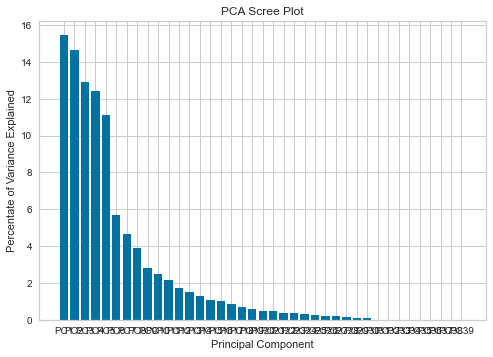

In [132]:
# 주성분 개수를 정하는 판단기준: Scree Plot
## x축: 주성분 개수, y축: 고유값

percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [ ]:
* 급격히 완만해지는 지점이 적절한 주성분 개수
>> PC8

In [142]:
from sklearn.decomposition import PCA
from pca import pca 
import seaborn as sns

pca = PCA(n_components=8)
pca_array = pca.fit_transform(data_scale)
pca_df = pd.DataFrame(pca_array, index=mp.index,
                      columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8'])
                      
model = pca(n_components=8)
results = model.fit_transform(data_scale)
fig, ax = model.biplot(n_feat=8, legend=False)

TypeError: 'PCA' object is not callable

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [39] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


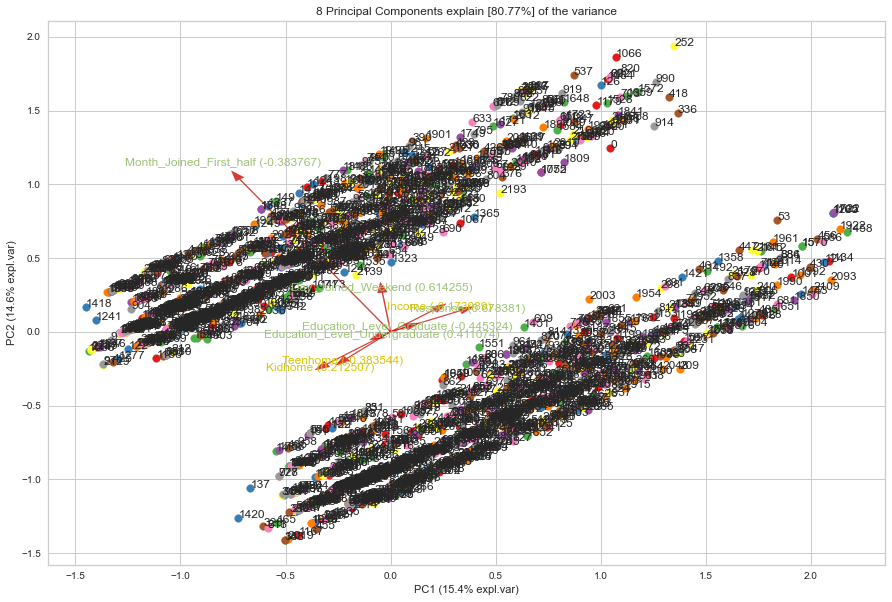

In [141]:
# biplot

from pca import pca

model = pca(n_components=8)
results = model.fit_transform(data_scale)
fig, ax = model.biplot(n_feat=8, legend=False)

In [134]:
pip install pca

Note: you may need to restart the kernel to use updated packages.
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=c971a6c5f6f61e3153e94c94f3faa942cf05d47f11e3a9bb7132fd3fd5292850
  Stored in directory: c:\users\abab6\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=294f242913c448a0ace900f88ca0dc22abceeaef8aea3a00ff3453c516393ef3
  Stored in directory: c:\users\abab6\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built sklearn wget


In [122]:
# 표준화된 데이터로 주성분분석을 진행. 
## 고유값을 기준으로 설명할 수 있는 분산량

pca = PCA(random_state=1107)
X_p = pca.fit_transform(data_scale)

pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.154644
1     0.301145
2     0.430122
3     0.554347
4     0.665286
5     0.722020
6     0.768508
7     0.807752
8     0.835747
9     0.860755
10    0.882139
11    0.899671
12    0.914693
13    0.927524
14    0.938326
15    0.948658
16    0.956950
17    0.964091
18    0.969692
19    0.974740
20    0.979407
21    0.983274
22    0.986752
23    0.989984
24    0.992489
25    0.994819
26    0.996667
27    0.998067
28    0.999188
29    1.000000
30    1.000000
31    1.000000
32    1.000000
33    1.000000
34    1.000000
35    1.000000
36    1.000000
37    1.000000
38    1.000000
dtype: float64

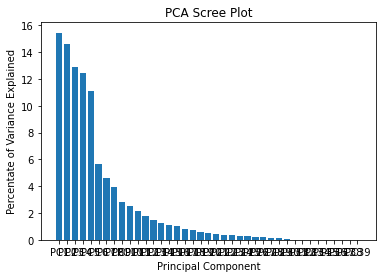

In [115]:
# 고유값이 설명가능한 분산량이 약 15%인 지점 pc1

percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [116]:
# 2개의 주성분 추출

X_pp = pd.DataFrame(X_p[:,:2], columns = ['PC1','PC2'], index = mp.index)
X_pp

,PC1,PC2
0,1.045003,1.245448
1,0.243640,-0.325683
2,0.677028,-0.400793
3,-0.271005,-0.943657
4,-0.966047,0.534632
...,...,...
2235,-0.566073,0.309121
2236,-0.448561,-1.085019
2237,0.631404,1.612930
2238,-0.734673,0.363851


In [110]:
# 데마 코드 참고
# 정규화 후 주성분 분석

from sklearn import preprocessing

pcs = PCA()
pcs.fit(preprocessing.scale(mp))

pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54
Standard deviation,3.1242,2.0137,1.9005,1.7890,1.6304,1.576,1.4560,1.4090,1.3373,1.2063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Proportion of variance,0.1807,0.0751,0.0669,0.0592,0.0492,0.046,0.0392,0.0367,0.0331,0.0269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cumulative proportion,0.1807,0.2557,0.3226,0.3818,0.4310,0.477,0.5162,0.5530,0.5861,0.6130,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### 10. 클러스터링 모델

In [ ]:
k-평균 군집 알고리즘 

* 작동방식

1. 무작위로 k개의 클러스터 중심을 지정

2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정

3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경함

4. 2번으로 돌아가 클러스터 중심에 변화가 없을 때까지 반복

### k값 선택 (엘보우 기법)

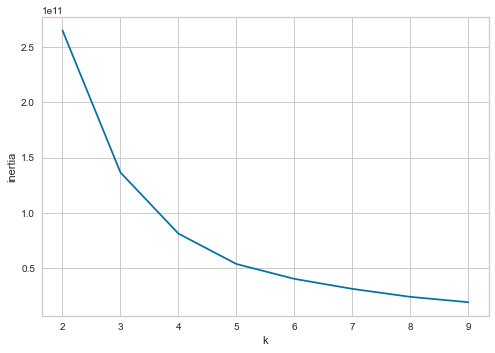

In [143]:
# 엘보우 기법 (elbow)
# 반복횟수 지정에 따라 변함

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


inertia = []
for k in range(2,10):
    kms=  KMeans(n_clusters=k)
    kms.fit(mp)
    inertia.append(kms.inertia_)
plt.plot(range(2,10), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()


In [ ]:
* 클러스터 개수의 범위를 2개에서 10개까지 지정함
각각의 inertia 값 중 꺾이는 지점을 찾아봄

>> 3개, 4개, 5개

* k가 늘어낼수록 대략적으로 오류율이 급속히 줄어들다가 
어느시점부터 오류율이 거의 감소하지 않는 지점이 발생하는데 이 지점을 최적 K 로 선택


In [94]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


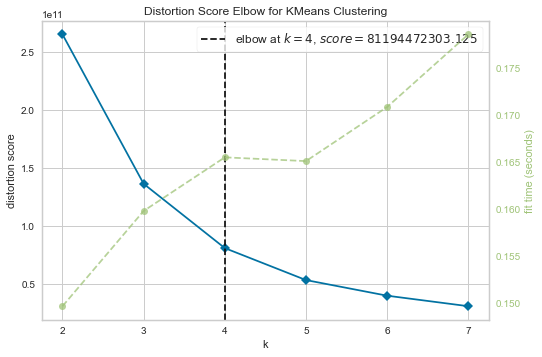

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [144]:
# 옐로우 브릭 모듈 사용
## k=4

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

elbow_method = KElbowVisualizer(KMeans(), k=7)
elbow_method.fit(mp)
elbow_method.show()

In [128]:
# k=4일 경우 kmeans

from sklearn.cluster import KMeans

kms = KMeans(n_clusters=4)
kms.fit(mp)

KMeans(n_clusters=4)

In [129]:
# 모델의 클러스터화 확인
## 군집된 결과는 KMeans 클래스 객체의 labels_ 속성에 저장됨
## 레이블 값 0,1,2와 레이블 순서에는 어떤 의미도 없음

print(kms.labels_)

[2 1 0 ... 2 2 2]


In [ ]:
#  K-means 군집화 결과 시각화
## x축: income, y축: 총 구매액
## 뚜렷하게 구분되지 않음 >> 변수 정리, 변수 추출

In [154]:
from sklearn.cluster import KMeans

k=4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
mp['cluster'] = model.fit_predict(data_scale)

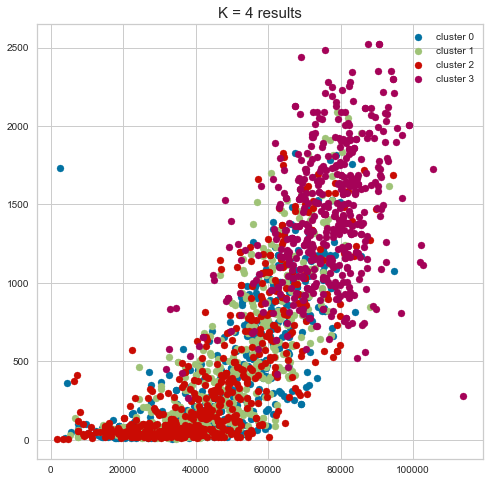

In [155]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(mp.loc[mp['cluster'] == i, 'Income'], mp.loc[mp['cluster'] == i, 'TotalMntSpent'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.show()

<AxesSubplot:xlabel='Income', ylabel='TotalMntSpent'>

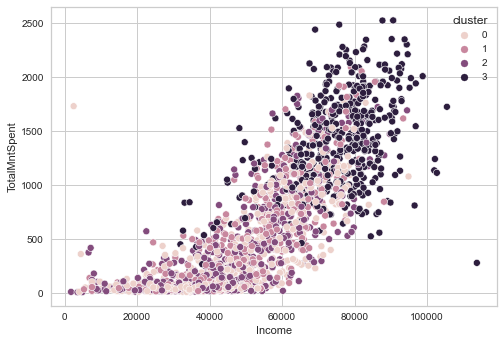

In [162]:
sns.scatterplot(x='Income', y='TotalMntSpent', hue='cluster', data=mp)

In [ ]:
## 7.31

In [ ]:
# k=3

In [83]:
# k=3일 경우 kmeans

from sklearn.cluster import KMeans

kms = KMeans(n_clusters=3)
kms.fit(mp)

KMeans(n_clusters=3)

In [84]:
# 모델의 클러스터화 확인
## 군집된 결과는 KMeans 클래스 객체의 labels_ 속성에 저장됨
## 레이블 값 0,1,2와 레이블 순서에는 어떤 의미도 없음

print(kms.labels_)

[0 0 2 ... 0 2 0]


In [85]:
# 50번째 고객이 속한 클러스터

print(kms.predict(mp[50:51]))

[2]


In [ ]:
# k = 5

In [86]:
# k=5일 경우 kmeans

from sklearn.cluster import KMeans

kms = KMeans(n_clusters=5)
kms.fit(mp)

KMeans(n_clusters=5)

In [87]:
# 모델의 클러스터화 확인
## 군집된 결과는 KMeans 클래스 객체의 labels_ 속성에 저장됨
## 레이블 값 0,1,2와 레이블 순서에는 어떤 의미도 없음

print(kms.labels_)

[2 2 4 ... 2 4 2]


In [88]:
# 50번째 고객이 속한 클러스터

print(kms.predict(mp[50:51]))

[4]


In [ ]:
// 

### 클러스터링 목적 및 결과 해석

In [ ]:
// 클러스터링 이후 결과물 어떻게 활용해야할지 고민
// 군집화 결과해석 곤란할 수 있음
// 고객들을 비슷한 유형, 니즈, 특성으로 군집화 한 후 마케팅 전략 수립, 제안